# ☀️ Solar Radiation Data Analysis — Benin 🇧🇯


In [2]:
#all imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append('../scripts')
import warnings
from data_quality_utils import columns_with_significant_missing_values,detect_outliers_zscore

In [3]:
#suppress all warnings
warnings.filterwarnings("ignore")

## 📊 1. Introduction & Objective

## 📦 2. Data Loading & Overview

#### Loading Data

In [4]:
#load the data from the github repo or #using locally stored dataset
df=pd.read_csv('../data/benin-malanville.csv')
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


#### Data Overview

In [5]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [6]:
df.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


In [7]:
df.sample(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
161550,2021-11-29 04:31,-1.6,-0.5,-1.7,0.0,0.0,16.9,86.2,0.0,0.0,0.0,0.0,0.0,993,0,0.0,15.1,14.3,NaN
431361,2022-06-04 13:22,900.0,461.1,434.8,794.2,787.9,35.9,41.8,2.4,2.9,0.4,269.4,10.4,993,0,0.0,67.7,60.0,NaN
429974,2022-06-03 14:15,943.0,547.8,418.7,850.0,842.0,35.3,38.6,0.9,1.6,0.7,123.6,10.3,992,0,0.0,56.4,53.5,NaN
10371,2021-08-16 04:52,-0.7,-0.2,-0.7,0.0,0.0,23.1,95.4,1.1,1.9,0.6,245.8,8.4,994,0,0.0,23.4,22.9,NaN
82211,2021-10-05 02:12,-1.7,-0.4,-1.7,0.0,0.0,26.3,92.0,0.1,1.1,0.4,193.2,4.7,994,0,0.0,25.6,25.0,NaN
302679,2022-03-07 04:40,-5.3,-0.6,-6.8,0.0,0.0,23.5,40.6,1.3,1.9,0.4,327.3,8.7,990,0,0.0,21.2,20.6,NaN
40768,2021-09-06 07:29,167.3,143.9,135.2,148.3,149.7,24.6,95.4,0.0,0.0,0.0,0.0,0.0,995,0,0.0,27.4,28.5,NaN
370230,2022-04-23 02:31,-2.5,-0.5,-2.7,0.0,0.0,31.6,52.4,2.5,2.9,0.4,217.6,8.5,991,0,0.0,30.9,30.3,NaN
381394,2022-04-30 20:35,-3.5,-0.4,-3.6,0.0,0.0,35.9,26.0,0.2,0.7,0.4,146.7,2.4,993,0,0.0,35.1,34.8,NaN
437250,2022-06-08 15:31,299.3,1.2,297.4,263.1,254.7,37.1,34.6,2.9,3.4,0.5,3.5,14.2,992,0,0.0,51.7,47.5,NaN


In [8]:
#shape of the dataset
df.shape

(525600, 19)

In [9]:
#list of columns of the dataset
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

## 🔍 3. Missing Values Analysis

### Summary Statistics & Missing-Value Report

In [10]:
#count of missing values per column
df.isna().sum() 

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

##### Columns with significant number of missing values

In [11]:
#column with >5% nulls
columns_with_significant_missing_values(df, threshold=5)

,#missing_values,percentage
Comments,525600,100.00%


## 📐 4. Data Types & Basic Stats

#### Data Summaries - basics stats

In [12]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,240.559452,331.131327,-12.9,-2.0,1.8,483.4,1413.0
DNI,525600.0,167.187516,261.710501,-7.8,-0.5,-0.1,314.2,952.3
DHI,525600.0,115.358961,158.691074,-12.6,-2.1,1.6,216.3,759.2
ModA,525600.0,236.589496,326.894859,0.0,0.0,4.5,463.7,1342.3
ModB,525600.0,228.883576,316.536515,0.0,0.0,4.3,447.9,1342.3
Tamb,525600.0,28.179683,5.924297,11.0,24.2,28.0,32.3,43.8
RH,525600.0,54.487969,28.073069,2.1,28.8,55.1,80.1,100.0
WS,525600.0,2.121113,1.603466,0.0,1.0,1.9,3.1,19.5
WSgust,525600.0,2.809195,2.029120,0.0,1.3,2.6,4.1,26.6
WSstdev,525600.0,0.473390,0.273395,0.0,0.4,0.5,0.6,4.2


In [13]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
Timestamp,525600,525600,2022-08-08 23:44,1


#### Data Types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

## 🧹 5. Data Cleaning

#### Duplicated Values

In [ ]:
#check for duplicates
print(df.duplicated().sum())

0


### Outlier Detection & Basic Cleaning

#### Detect outliers

In [116]:
#checking for outliers in select columns
#using z-score method
columns_to_check_for_outliers = ['ModA','ModB','WS','WSgust','GHI','DHI','DNI']
outlier_counts = {
    "column": [],
    "num_outliers": []
}

for col in columns_to_check_for_outliers:
    outliers = detect_outliers_zscore(df, col)
    outlier_counts["column"].append(col)
    outlier_counts["num_outliers"].append(len(outliers))

outlier_df = pd.DataFrame(outlier_counts)
print(outlier_df)
    

   column  num_outliers
0    ModA            27
1    ModB            63
2      WS          3109
3  WSgust          3500
4     GHI            89
5     DHI          3738
6     DNI             0


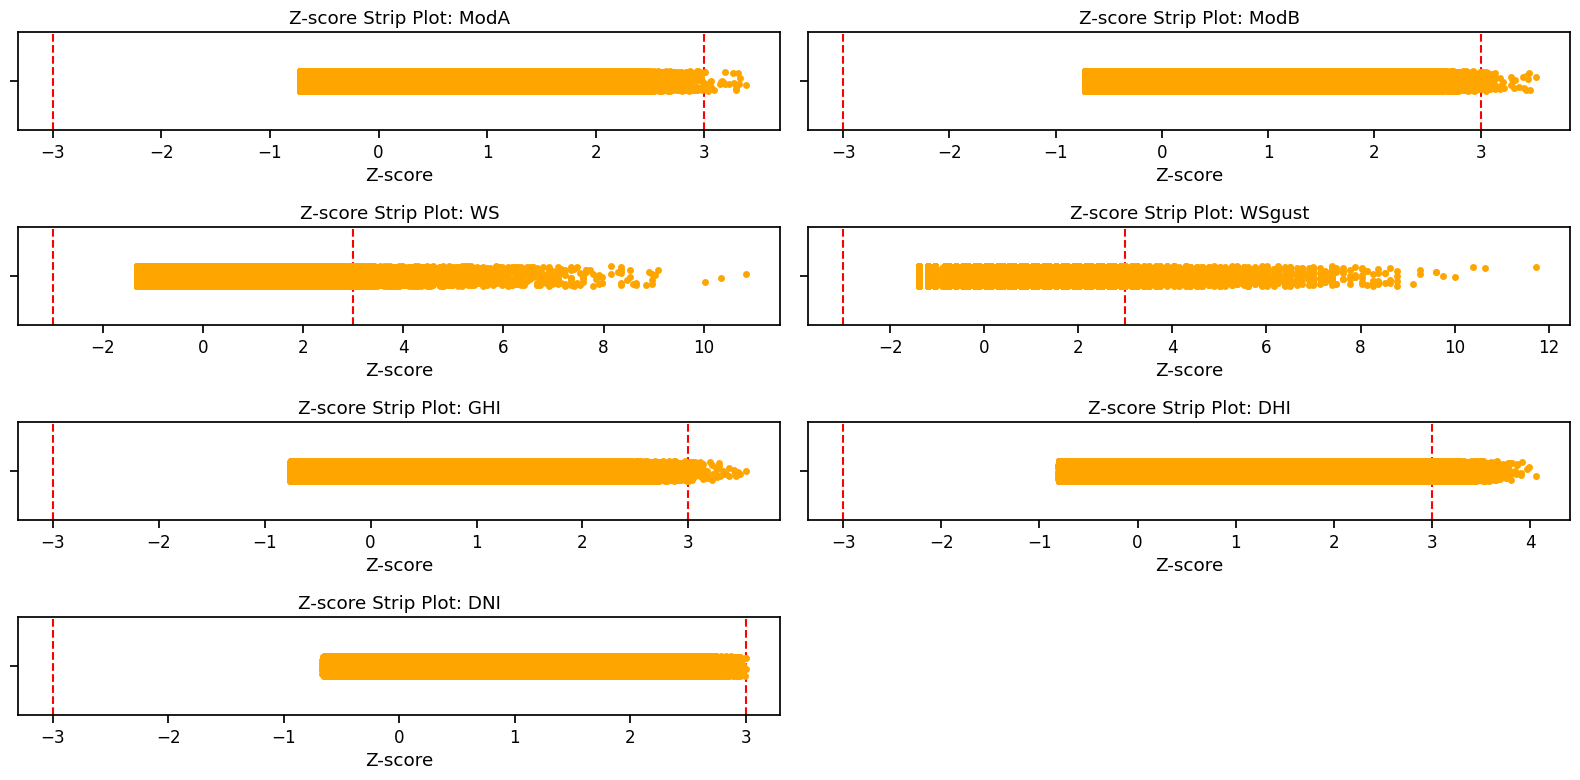

In [123]:
#Z-Score Outlier Strip Plot
n_cols = 2# adjust as needed
n_rows = (len(columns_to_check_for_outliers) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 2 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_to_check_for_outliers):
    df['z'] = zscore(df[col].dropna())
    sns.stripplot(x='z', data=df.dropna(subset=[col]), color='orange', ax=axes[i])
    axes[i].axvline(3, color='red', linestyle='--')
    axes[i].axvline(-3, color='red', linestyle='--')
    axes[i].set_title(f'Z-score Strip Plot: {col}')
    axes[i].set_xlabel('Z-score')

# Remove unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


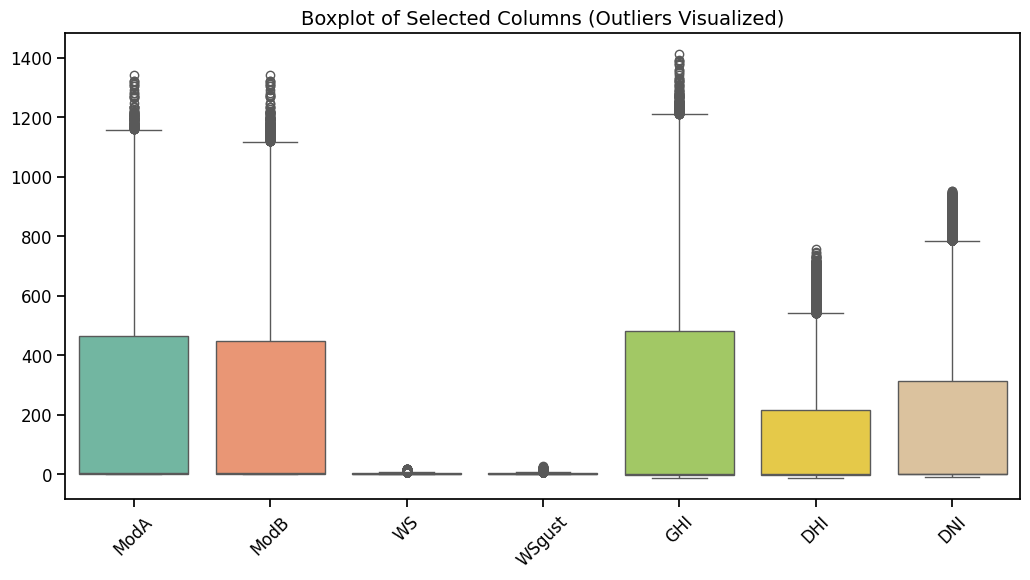

In [132]:
#Visualizing outliers using boxplots
plt.figure(figsize=(max(8, num_cols * 1.5), 6))  # Auto-adjust width
sns.set_context("notebook", font_scale=1.1)

sns.boxplot(data=df[columns_to_check_for_outliers], palette="Set2")
plt.title("Boxplot of Selected Columns (Outliers Visualized)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


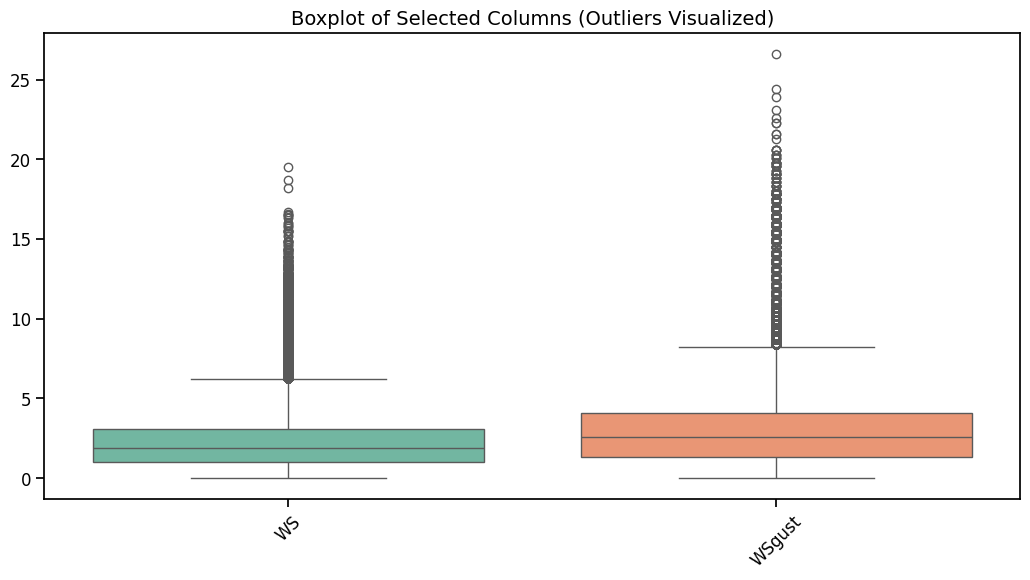

In [130]:
#Singling out WS and WSgust
plt.figure(figsize=(max(8, num_cols * 1.5), 6))  # Auto-adjust width
sns.set_context("notebook", font_scale=1.1)

sns.boxplot(data=df[columns_to_check_for_outliers[2:4]], palette="Set2")
plt.title("Boxplot of Selected Columns (Outliers Visualized)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Cleaning Impact

## 📈 6. Univariate Analysis (Single Variable)

## 📉 7. Bivariate/Multivariate Analysis

### Temperature Analysis

### Correlation & Relationship Analysis

### Bubble Chart

### Wind & Distribution Analysis

## 📅 9.  Time Series Trends 

### Time Series Analysis

## 🧠 10. Key Insights

## 🔚 11. Conclusion & Next Steps